# Table of Contents

0.1 Importing Libraries

0.2 Importing Data

0.3 Exploring Original Dfs

0.4 Preparatory work

    0.5.1 df_user_subset where each row = 1 user
    0.5.2 df_order_subset where each row = 1 order 
    0.5.3 Random sample of 30% of the data

0.5 Defining styles, formats, and commonly used variables

0.6 Exploration of data by age and family

    0.6.1 Users - total, income
    0.6.2 Items - total, avg by order
    0.6.3 Gross sales - total, avg by order
    0.6.4 Departmental totals, proportions
    0.6.5 Ordering habits - day of week, time of day, frequency


### 0.1 Importing Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### 0.2 Importing Data

In [2]:
# Identify the file pathway to data files
path = r'C:\Users\CJ\Documents\_CJ-Stuff\Career Foundry\Data Immersion\Ach 4 - Python\2023-03 Instacart Basket Analysis'

In [3]:
# Import data from 'orders_products_all3.pkl'
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all3.pkl'))

In [4]:
# Import data from 'dept_data.pkl'
dept_data = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'department_data.pkl'))

### 0.3 Exploring Original dfs

In [5]:
df.shape

(32434489, 45)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434489 entries, 0 to 32434488
Data columns (total 45 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   order_id                     int64         
 1   user_id                      int64         
 2   order_number                 int16         
 3   order_day_of_week            int8          
 4   order_hour_of_day            int8          
 5   days_since_prior_order       float16       
 6   first_order_of_new_customer  bool          
 7   product_id                   int32         
 8   add_to_cart_order            int16         
 9   reordered                    int8          
 10  product_name                 object        
 11  aisle_id                     float16       
 12  department_id                float16       
 13  price                        float32       
 14  product_info_available       bool          
 15  price_available              bool          
 16

In [7]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order_of_new_customer,product_id,add_to_cart_order,reordered,...,total_spent_in_order,total_spent_in_lifetime,total_items_in_lifetime,avg_items_per_order_by_user,baby_parent,pet_owner,income_group,senior_citizen,two_parent_fam,single_parent
0,2539329,1,1,2,8,NaN,True,196,1,0,...,31.6,375.700012,59,5.898438,False,False,Low income,False,True,False
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,31.6,375.700012,59,5.898438,False,False,Low income,False,True,False
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,31.6,375.700012,59,5.898438,False,False,Low income,False,True,False
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,31.6,375.700012,59,5.898438,False,False,Low income,False,True,False
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,31.6,375.700012,59,5.898438,False,False,Low income,False,True,False


In [8]:
df.isnull().sum()

order_id                             0
user_id                              0
order_number                         0
order_day_of_week                    0
order_hour_of_day                    0
days_since_prior_order         2078068
first_order_of_new_customer          0
product_id                           0
add_to_cart_order                    0
reordered                            0
product_name                     30770
aisle_id                         30770
department_id                    30770
price                            35897
product_info_available               0
price_available                      0
price_range                      35897
busiest_day                          0
busiest_days                         0
busiest_period_of_day                0
max_order                            0
loyalty_flag                         0
mean_spending                        0
spender_type                         0
median_days_since_ordering           0
frequent_shopper         

All nulls have been previously accounted for and labeled appropriately with flags.

In [9]:
dept_data.shape

(21, 8)

In [10]:
dept_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 20
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   department                   21 non-null     category
 1   department_id                21 non-null     int8    
 2   total_items_sold_by_dept     21 non-null     int64   
 3   total_spent_in_dept          21 non-null     float32 
 4   avg_price_per_item_in_dept   21 non-null     float32 
 5   total_orders_from_dept       21 non-null     int32   
 6   avg_items_per_order_by_dept  21 non-null     float32 
 7   n_unique_items_in_dept       21 non-null     int16   
dtypes: category(1), float32(3), int16(1), int32(1), int64(1), int8(1)
memory usage: 924.0 bytes


In [11]:
dept_data.head()

,department,department_id,total_items_sold_by_dept,total_spent_in_dept,avg_price_per_item_in_dept,total_orders_from_dept,avg_items_per_order_by_dept,n_unique_items_in_dept
0,frozen,1,2234743,17289206.00,7.736552,1180461,1.893110,4006
1,other,2,36291,253708.00,6.990934,35056,1.035229,548
2,bakery,3,1172428,9208026.00,7.853809,878658,1.334339,1515
3,produce,4,9479291,75660936.00,7.981709,2409320,3.934426,1684
4,alcohol,5,153696,1251654.25,8.143701,84689,1.814828,1054


In [12]:
dept_data.isnull().sum()

department                     0
department_id                  0
total_items_sold_by_dept       0
total_spent_in_dept            0
avg_price_per_item_in_dept     0
total_orders_from_dept         0
avg_items_per_order_by_dept    0
n_unique_items_in_dept         0
dtype: int64

### 0.4.1 Subset df with each row = 1 user

In [13]:
# Create a temporary df to use for visualizations that should be per user
# rather than per item ordered
df_user_subset = pd.DataFrame()

In [14]:
df_user_subset = df[['user_id', 'loyalty_flag', 'spender_type', 'frequent_shopper', 'gender', 'age', 'n_dependants', 'fam_status', 'income', 'income_group', 'region', 'low_activity_flag', 'total_spent_in_lifetime', 'total_items_in_lifetime', 'avg_items_per_order_by_user', 'baby_parent', 'pet_owner', 'senior_citizen', 'two_parent_fam', 'single_parent']]

In [15]:
df_user_subset.head()

,user_id,loyalty_flag,spender_type,frequent_shopper,gender,age,n_dependants,fam_status,income,income_group,region,low_activity_flag,total_spent_in_lifetime,total_items_in_lifetime,avg_items_per_order_by_user,baby_parent,pet_owner,senior_citizen,two_parent_fam,single_parent
0,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,South,False,375.700012,59,5.898438,False,False,False,True,False
1,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,South,False,375.700012,59,5.898438,False,False,False,True,False
2,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,South,False,375.700012,59,5.898438,False,False,False,True,False
3,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,South,False,375.700012,59,5.898438,False,False,False,True,False
4,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,South,False,375.700012,59,5.898438,False,False,False,True,False


In [16]:
df_user_subset.shape

(32434489, 20)

This has the same number of rows as the original df and only the 20 subsetted columns.

In [17]:
# Remove duplicate rows
df_user_subset = df_user_subset.drop_duplicates()

In [18]:
# Checking new shape
df_user_subset.shape

(206209, 20)

In [19]:
df_user_subset.head()

,user_id,loyalty_flag,spender_type,frequent_shopper,gender,age,n_dependants,fam_status,income,income_group,region,low_activity_flag,total_spent_in_lifetime,total_items_in_lifetime,avg_items_per_order_by_user,baby_parent,pet_owner,senior_citizen,two_parent_fam,single_parent
0,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,South,False,375.700012,59,5.898438,False,False,False,True,False
59,2,Regular customer,Low spender,Regular customer,Female,68,3,married,64940,Middle class,West,False,1465.599976,195,13.929688,False,False,True,True,False
254,3,Regular customer,Low spender,Regular customer,Female,33,3,married,93240,Middle class,West,False,721.400024,88,7.332031,False,False,False,True,False
342,4,New customer,Low spender,Regular customer,Male,31,3,married,45435,Low income,South,False,147.699997,18,3.599609,False,False,False,True,False
360,5,New customer,Low spender,Regular customer,Female,75,0,divorced/widowed,115242,Middle class,West,True,340.000000,37,9.250000,False,False,True,False,False


Now we have a dataframe that reflects the users specifically.

### 0.4.2 Subset of df where each row = 1 order

In [20]:
# Create a temporary df to use for visualizations that should be per order
# rather than per item 
df_order_subset = pd.DataFrame()

In [21]:
df_order_subset = df[['order_id', 
                     'user_id', 
                     'order_day_of_week',
                     'order_hour_of_day',
                     'days_since_prior_order',
                     'first_order_of_new_customer',
                     'max_order', 
                     'loyalty_flag', 
                     'spender_type', 
                     'frequent_shopper', 
                     'gender', 
                     'age', 
                     'n_dependants', 
                     'fam_status', 
                     'income', 
                     'income_group', 
                     'region', 
                     'low_activity_flag', 
                     'total_spent_in_order', 
                     'total_spent_in_lifetime', 
                     'total_items_in_lifetime', 
                     'avg_items_per_order_by_user', 
                     'baby_parent', 
                     'pet_owner', 
                     'senior_citizen', 
                     'two_parent_fam', 
                     'single_parent']]

In [22]:
df_order_subset.head()

,order_id,user_id,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order_of_new_customer,max_order,loyalty_flag,spender_type,frequent_shopper,...,low_activity_flag,total_spent_in_order,total_spent_in_lifetime,total_items_in_lifetime,avg_items_per_order_by_user,baby_parent,pet_owner,senior_citizen,two_parent_fam,single_parent
0,2539329,1,2,8,NaN,True,10,New customer,Low spender,Regular customer,...,False,31.6,375.700012,59,5.898438,False,False,False,True,False
1,2539329,1,2,8,NaN,True,10,New customer,Low spender,Regular customer,...,False,31.6,375.700012,59,5.898438,False,False,False,True,False
2,2539329,1,2,8,NaN,True,10,New customer,Low spender,Regular customer,...,False,31.6,375.700012,59,5.898438,False,False,False,True,False
3,2539329,1,2,8,NaN,True,10,New customer,Low spender,Regular customer,...,False,31.6,375.700012,59,5.898438,False,False,False,True,False
4,2539329,1,2,8,NaN,True,10,New customer,Low spender,Regular customer,...,False,31.6,375.700012,59,5.898438,False,False,False,True,False


In [23]:
df_order_subset.shape

(32434489, 27)

In [24]:
# Remove duplicate rows
df_order_subset = df_order_subset.drop_duplicates()

In [25]:
# Checking new shape
df_order_subset.shape

(3214874, 27)

In [26]:
# Confirming uniqueness of order_id s
df_order_subset['order_id'].nunique()

3214874

In [27]:
df_order_subset.head()

,order_id,user_id,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order_of_new_customer,max_order,loyalty_flag,spender_type,frequent_shopper,...,low_activity_flag,total_spent_in_order,total_spent_in_lifetime,total_items_in_lifetime,avg_items_per_order_by_user,baby_parent,pet_owner,senior_citizen,two_parent_fam,single_parent
0,2539329,1,2,8,NaN,True,10,New customer,Low spender,Regular customer,...,False,31.600000,375.700012,59,5.898438,False,False,False,True,False
5,2398795,1,3,7,15.0,False,10,New customer,Low spender,Regular customer,...,False,35.400002,375.700012,59,5.898438,False,False,False,True,False
11,473747,1,3,12,21.0,False,10,New customer,Low spender,Regular customer,...,False,28.200001,375.700012,59,5.898438,False,False,False,True,False
16,2254736,1,4,7,29.0,False,10,New customer,Low spender,Regular customer,...,False,26.000000,375.700012,59,5.898438,False,False,False,True,False
21,431534,1,4,15,28.0,False,10,New customer,Low spender,Regular customer,...,False,57.000000,375.700012,59,5.898438,False,False,False,True,False


Now we have a df with just the 3,214,874 orders each on their own row

In [28]:
# Let's add the number of items in each order to this df

# First we create a temp df to hold that information
temp = pd.DataFrame(df.groupby('order_id').add_to_cart_order.max())
temp.head()

,add_to_cart_order
order_id,
2,9
3,8
4,13
5,26
6,3


In [29]:
# Merge this data with the df_order_subset

df_order_subset = df_order_subset.merge(temp, on = ['order_id'], how='left', indicator = True)

In [30]:
# Confirming that all rows got a value
df_order_subset['_merge'].value_counts()

both          3214874
left_only           0
right_only          0
Name: _merge, dtype: int64

In [31]:
# Dropping the merge field as no longer necessary
df_order_subset = df_order_subset.drop(columns = '_merge')

In [32]:
# Rename column to be more meaningful for this df
df_order_subset = df_order_subset.rename(columns = {'add_to_cart_order':'n_items_in_order'})

In [33]:
# Confirming everything looks fine
df_order_subset.head()

,order_id,user_id,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order_of_new_customer,max_order,loyalty_flag,spender_type,frequent_shopper,...,total_spent_in_order,total_spent_in_lifetime,total_items_in_lifetime,avg_items_per_order_by_user,baby_parent,pet_owner,senior_citizen,two_parent_fam,single_parent,n_items_in_order
0,2539329,1,2,8,NaN,True,10,New customer,Low spender,Regular customer,...,31.600000,375.700012,59,5.898438,False,False,False,True,False,5
1,2398795,1,3,7,15.0,False,10,New customer,Low spender,Regular customer,...,35.400002,375.700012,59,5.898438,False,False,False,True,False,6
2,473747,1,3,12,21.0,False,10,New customer,Low spender,Regular customer,...,28.200001,375.700012,59,5.898438,False,False,False,True,False,5
3,2254736,1,4,7,29.0,False,10,New customer,Low spender,Regular customer,...,26.000000,375.700012,59,5.898438,False,False,False,True,False,5
4,431534,1,4,15,28.0,False,10,New customer,Low spender,Regular customer,...,57.000000,375.700012,59,5.898438,False,False,False,True,False,8


### 0.4.4 Random sampling of 30% of data 

In [34]:
# Assign a random number between 0-1 to each row of the df
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [35]:
# Split the df into two samples
# big = 70% of df
# small = 30% of df
big = df[dev]
small = df[~dev]

In [36]:
# Compare the sample dfs to the original
len(df)

32434489

In [37]:
len(big) + len(small)

32434489

This random sampling can be used for any line charts where using the full df would be too memory-intensive.

### 0.5 Defining styles and label formats

In [38]:
# Creating a consistent style for titles and axis labels
font_title = {'family':'serif','color':'forestgreen','size':20}
font_sm_title = {'family':'serif','color':'forestgreen','size':16}
font_label = {'family': 'serif', 'color' :'forestgreen', 'size':15}
font_sm_label = {'family': 'serif', 'color' :'forestgreen', 'size':13}

In [39]:
# Identifying the days of the week that go with the code in the df
# 0 = Sat, 1 = Sun, etc.
dow = ('Sat', 'Sun', 'Mon', 'Tues', 'Weds', 'Thurs', 'Fri')
dow_xticks = np.arange(len(dow))

In [40]:
# Identifying the hours of the day that go with the code in the df
# 0 = 12 a.m., 1 = 1 a.m.... 13 = 1 p.m., etc.
hod = ('Midnight','1 a.m.', '2 a.m.', '3 a.m.', '4 a.m.', '5 a.m.', 
       '6 a.m.', '7 a.m.', '8 a.m.', '9 a.m.', '10 a.m.', '11 a.m.', 
       'Noon', '1 p.m.', '2 p.m.', '3 p.m.', '4 p.m.', '5 p.m.', 
       '6 p.m.', '7 p.m.', '8 p.m.', '9 p.m.', '10 p.m.', '11 p.m.')
hod_xticks = np.arange(len(hod))

In [41]:
# Turning off the scientific notation
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

In [42]:
# Setting up some commonly needed variables

# Calculating the gross sales for the entire df
total_gross=df['price'].sum()
total_gross

252418420.0

In [43]:
# Calculating the total items for the entire df
total_items=len(df)
total_items

32434489

In [44]:
# Calculating the total users 
total_users=len(df_user_subset)
total_users

206209

In [45]:
# Calculating the total orders 
total_orders=len(df_order_subset)
total_orders

3214874

### 0.6 Exploration of data by income_group

In [46]:
# Getting list of profile labels
df_user_subset.income_group.unique()

['Low income', 'Middle class', 'Upper middle class', 'Affluent']
Categories (4, object): ['Affluent', 'Low income', 'Middle class', 'Upper middle class']

In [51]:
# Identifying which profile we are investigating
profile = 'income_group'
profile_label = 'Income Groupings'
labels = ['Low income', 'Middle class', 'Upper middle class', 'Affluent']
colors = ['lightgrey', 'darkgrey', 'grey', 'dimgrey']
prof1 = 'Low income'
prof2 = 'Middle class'
prof3 = 'Upper middle class'
prof4 = 'Affluent'

#### Users - total, gender, income

In [48]:
user_count = pd.DataFrame(df_user_subset[profile].value_counts())
user_count

,income_group
Middle class,148853
Low income,34105
Upper middle class,22554
Affluent,697


In [49]:
user_percent = pd.DataFrame(user_count/total_users)
user_percent

,income_group
Middle class,0.72
Low income,0.17
Upper middle class,0.11
Affluent,0.00


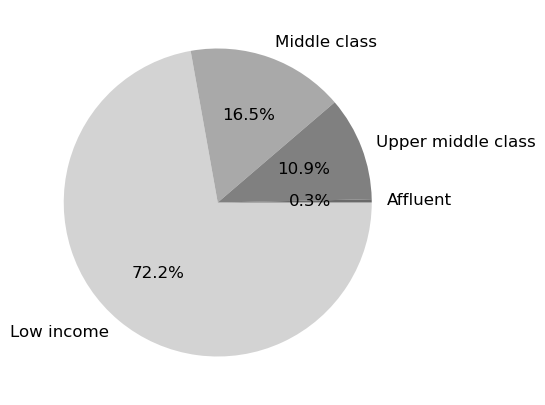

In [52]:
profile_pie = user_count.plot.pie(y=profile, 
                            figsize=(10,5), 
                            counterclock=False, 
                            colors =  ['lightgrey', 'darkgrey', 'grey', 'dimgrey'],
                            legend=False, 
                            labels = labels, 
                            autopct='%1.1f%%',
                            textprops={'fontsize':12})
plt.ylabel("")

plt.show()

In [53]:
# Create filename for export
filename = profile+'_pie.png'
filename

'income_group_pie.png'

In [54]:
# Exporting bar chart
profile_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', filename))

In [55]:
# Checking the distribution of genders by profile
gender_count = pd.crosstab(index=df_user_subset[profile],
                            columns=df_user_subset['gender'],
                            normalize='index')
gender_count

gender,Female,Male
income_group,,
Affluent,0.49,0.51
Low income,0.50,0.50
Middle class,0.50,0.50
Upper middle class,0.50,0.50


In [56]:
# Checking the distribution of incomes by profile
income_count = pd.crosstab(index=df_user_subset[profile],
                            columns=df_user_subset['income_group'],
                            normalize='index')
income_count

income_group,Affluent,Low income,Middle class,Upper middle class
income_group,,,,
Affluent,1.00,0.00,0.00,0.00
Low income,0.00,1.00,0.00,0.00
Middle class,0.00,0.00,1.00,0.00
Upper middle class,0.00,0.00,0.00,1.00


In [ ]:
# Checking distribution by age

In [58]:
# Creating two-column subset
df_5 = df_user_subset[['age', 'income']]

Text(0.5, 1.0, 'Only customers over 40 achieve the highest incomes (>$400k).\n')

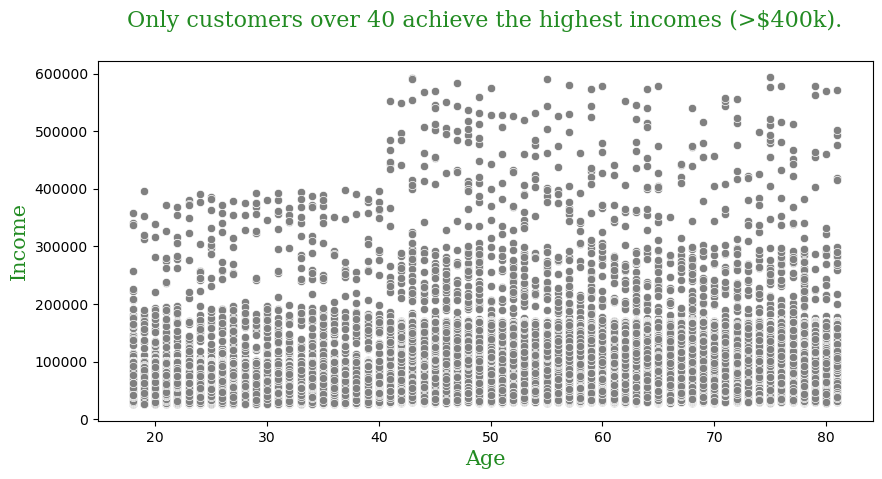

In [59]:
# Formatting the plot to have some white space around it
fig, ax = plt.subplots(figsize=(10,6))

# Making a scatterplot to see if there is a relationship 
# between age and spending power
scat_age_income = sns.scatterplot(x = 'age', 
                                  y = 'income', 
                                  data = df_5, 
                                  color = 'grey')

# Format margins so it doesn't feel crowded
plt.subplots_adjust(top=0.8)
plt.subplots_adjust(bottom=0.2)

# Format labels and titles for clarity
plt.xlabel("Age", fontdict = font_label )

plt.ylabel("Income", fontdict = font_label )

plt.title ("Only customers over 40 achieve the highest incomes (>$400k).\n", fontdict = font_sm_title)



In [53]:
# Exporting scatterplot
scat_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_income.png'))

In [60]:
# Checking the distribution of seniors by profile
senior_count = pd.crosstab(index=df_user_subset[profile],
                            columns=df_user_subset['senior_citizen'],
                            normalize='index')
senior_count

senior_citizen,False,True
income_group,,
Affluent,0.69,0.31
Low income,0.79,0.21
Middle class,0.74,0.26
Upper middle class,0.59,0.41


In [61]:
# Checking the distribution of profile by seniors
prof_senior_count = pd.crosstab(index=df_user_subset['senior_citizen'],
                            columns=df_user_subset[profile ],
                            normalize='index')
prof_senior_count

income_group,Affluent,Low income,Middle class,Upper middle class
senior_citizen,,,,
False,0.00,0.18,0.73,0.09
True,0.00,0.13,0.70,0.17


.

Checking the distribution of fam_status by age

####     0.6.2 Items - total, avg by order

In [63]:
item_count = pd.DataFrame(df[profile].value_counts())
item_count

,income_group
Middle class,24782167
Upper middle class,3871734
Low income,3597890
Affluent,182698


In [64]:
item_percent = pd.DataFrame(item_count/total_items)
item_percent

,income_group
Middle class,0.76
Upper middle class,0.12
Low income,0.11
Affluent,0.01


In [65]:
# Compare items per user
items_per_user = pd.DataFrame(item_count/user_count)
items_per_user

,income_group
Affluent,262.12
Low income,105.49
Middle class,166.49
Upper middle class,171.67


In [66]:
avg_order = df_order_subset.groupby(profile).n_items_in_order.mean()
avg_order

income_group
Affluent             11.88
Low income            7.84
Middle class         10.45
Upper middle class   10.51
Name: n_items_in_order, dtype: float64

#### 0.6.3 Gross sales - total, avg by order

In [67]:
gross_by_profile = pd.DataFrame(df.groupby(profile).price.sum())
gross_by_profile

,price
income_group,
Affluent,"1,405,168.75"
Low income,"24,068,766.00"
Middle class,"196,189,072.00"
Upper middle class,"30,755,360.00"


In [68]:
gross_percent_by_profile = gross_by_profile/total_gross
gross_percent_by_profile

,price
income_group,
Affluent,0.01
Low income,0.10
Middle class,0.78
Upper middle class,0.12


In [69]:
avg_order_gross_by_profile = df_order_subset.groupby(profile).total_spent_in_order.mean()
avg_order_gross_by_profile

income_group
Affluent             91.39
Low income           52.42
Middle class         82.71
Upper middle class   83.46
Name: total_spent_in_order, dtype: float32

#### 0.6.4 Departmental totals, proportions

In [70]:
gross_by_profile_dept = pd.DataFrame(df.groupby([profile, 'department_id']).price.sum())
gross_by_profile_dept

price
income_group       department_id             
Affluent           1.00            109,630.50
                   2.00              3,018.60
                   3.00             68,803.00
                   4.00            303,247.59
                   5.00             37,101.80
...                                       ...
Upper middle class 17.00           662,184.81
                   18.00           404,252.91
                   19.00         1,294,128.25
                   20.00           995,546.62
                   21.00            74,980.40

[84 rows x 1 columns]

In [71]:
# Rename column to be more desciptive
gross_by_profile_dept.rename(columns={'price':'gross_sales'}, inplace=True)

In [72]:
# Reset the index so the correct column headers will appear
gross_by_profile_dept = gross_by_profile_dept.reset_index()

In [73]:
gross_by_profile_dept

,income_group,department_id,gross_sales
0,Affluent,1.00,"109,630.50"
1,Affluent,2.00,"3,018.60"
2,Affluent,3.00,"68,803.00"
3,Affluent,4.00,"303,247.59"
4,Affluent,5.00,"37,101.80"
...,...,...,...
79,Upper middle class,17.00,"662,184.81"
80,Upper middle class,18.00,"404,252.91"
81,Upper middle class,19.00,"1,294,128.25"
82,Upper middle class,20.00,"995,546.62"


In [74]:
# Pulling each of the profile groups into their own temp dataframe to allow
# reformatting data so they'll play nice with visualizations

prof1_gross_df = pd.DataFrame(gross_by_profile_dept[gross_by_profile_dept[profile]==prof1])
prof2_gross_df = pd.DataFrame(gross_by_profile_dept[gross_by_profile_dept[profile]==prof2])
prof3_gross_df = pd.DataFrame(gross_by_profile_dept[gross_by_profile_dept[profile]==prof3])
prof4_gross_df = pd.DataFrame(gross_by_profile_dept[gross_by_profile_dept[profile]==prof4])

In [75]:
# Rename columns to be more desciptive
prof1_gross_df.rename(columns={'gross_sales': prof1+'_gross'}, inplace=True)
prof2_gross_df.rename(columns={'gross_sales': prof2+'_gross'}, inplace=True)
prof3_gross_df.rename(columns={'gross_sales': prof3+'_gross'}, inplace=True)
prof4_gross_df.rename(columns={'gross_sales': prof4+'_gross'}, inplace=True)

In [76]:
# Removing unnecessary columns
prof1_gross_df = prof1_gross_df.drop(columns = [profile])
prof2_gross_df = prof2_gross_df.drop(columns = [profile])
prof3_gross_df = prof3_gross_df.drop(columns = [profile])
prof4_gross_df = prof4_gross_df.drop(columns = [profile])

In [77]:
# Merge temp dfs
combo_gross_by_flag = prof1_gross_df.merge(prof2_gross_df, on = 'department_id', how='left')

In [78]:
combo_gross_by_flag = combo_gross_by_flag.merge(prof3_gross_df, on = 'department_id', how='left')

In [79]:
combo_gross_by_flag = combo_gross_by_flag.merge(prof4_gross_df, on = 'department_id', how='left')

In [80]:
# Merge dept name to allow for easier visualizations
combo_gross_by_flag = pd.merge(combo_gross_by_flag, dept_data[['department_id', 'department']], on = ['department_id'], how='left')

In [81]:
# Set the department name to be used as the index
combo_gross_by_flag = combo_gross_by_flag.set_index('department')

In [82]:
# Drop the department_id column so it doesn't interfere with visualizations
combo_gross_by_flag = combo_gross_by_flag.drop(columns = ['department_id'])

In [83]:
# Sort departments by alphabetical order for more consistent look to axes
combo_gross_by_flag_sort = combo_gross_by_flag.sort_values('department', ascending=False)

In [84]:
combo_gross_by_flag_sort

,Low income_gross,Middle class_gross,Upper middle class_gross,Affluent_gross
department,,,,
snacks,"2,477,893.00","8,506,146.00","1,294,128.25","67,371.00"
produce,"6,313,026.00","59,808,788.00","9,235,872.00","303,247.59"
pets,"64,767.50","597,964.38","96,593.00","11,563.50"
personal care,"389,636.09","2,734,182.00","426,662.59","22,692.00"
pantry,"1,339,755.38","11,732,893.00","1,862,491.12","85,521.20"
other,"25,575.20","192,555.09","32,559.10","3,018.60"
missing,"58,298.80","463,916.50","74,980.40","1,649.50"
meat seafood,"568,432.38","9,411,502.00","1,498,942.25","72,693.50"
international,"164,591.00","1,637,204.88","254,506.20","12,170.60"




Create a proportional table

In [85]:
# Merging the total per department to create a table of proportions/percents
# of gross sales by price_range
combo_gross_by_dept_prop = pd.merge(combo_gross_by_flag_sort, dept_data[['department', 'total_spent_in_dept']], on = ['department'], how='left')

In [86]:
# Set the department name to be used as the index
combo_gross_by_dept_prop = combo_gross_by_dept_prop.set_index('department')

In [87]:
combo_gross_by_dept_prop.head()

,Low income_gross,Middle class_gross,Upper middle class_gross,Affluent_gross,total_spent_in_dept
department,,,,,
snacks,"2,477,893.00","8,506,146.00","1,294,128.25","67,371.00","12,345,538.00"
produce,"6,313,026.00","59,808,788.00","9,235,872.00","303,247.59","75,660,936.00"
pets,"64,767.50","597,964.38","96,593.00","11,563.50","770,888.38"
personal care,"389,636.09","2,734,182.00","426,662.59","22,692.00","3,573,172.75"
pantry,"1,339,755.38","11,732,893.00","1,862,491.12","85,521.20","15,020,661.00"


In [88]:
# Creating proportional fields
combo_gross_by_dept_prop[prof1+'_prop'] = combo_gross_by_dept_prop[prof1+'_gross']/combo_gross_by_dept_prop['total_spent_in_dept']
combo_gross_by_dept_prop[prof2+'_prop'] = combo_gross_by_dept_prop[prof2+'_gross']/combo_gross_by_dept_prop['total_spent_in_dept']
combo_gross_by_dept_prop[prof3+'_prop'] = combo_gross_by_dept_prop[prof3+'_gross']/combo_gross_by_dept_prop['total_spent_in_dept']
combo_gross_by_dept_prop[prof4+'_prop'] = combo_gross_by_dept_prop[prof4+'_gross']/combo_gross_by_dept_prop['total_spent_in_dept']

In [89]:
combo_gross_by_dept_prop.head()

,Low income_gross,Middle class_gross,Upper middle class_gross,Affluent_gross,total_spent_in_dept,Low income_prop,Middle class_prop,Upper middle class_prop,Affluent_prop
department,,,,,,,,,
snacks,"2,477,893.00","8,506,146.00","1,294,128.25","67,371.00","12,345,538.00",0.20,0.69,0.10,0.01
produce,"6,313,026.00","59,808,788.00","9,235,872.00","303,247.59","75,660,936.00",0.08,0.79,0.12,0.00
pets,"64,767.50","597,964.38","96,593.00","11,563.50","770,888.38",0.08,0.78,0.13,0.02
personal care,"389,636.09","2,734,182.00","426,662.59","22,692.00","3,573,172.75",0.11,0.77,0.12,0.01
pantry,"1,339,755.38","11,732,893.00","1,862,491.12","85,521.20","15,020,661.00",0.09,0.78,0.12,0.01


In [90]:
# Drop the columns that are no longer needed
combo_gross_by_dept_prop = combo_gross_by_dept_prop.drop(columns = [prof1+'_gross', prof2+'_gross', prof3+'_gross', prof4+'_gross', 'total_spent_in_dept' ])


In [91]:
combo_gross_by_dept_prop

,Low income_prop,Middle class_prop,Upper middle class_prop,Affluent_prop
department,,,,
snacks,0.20,0.69,0.10,0.01
produce,0.08,0.79,0.12,0.00
pets,0.08,0.78,0.13,0.02
personal care,0.11,0.77,0.12,0.01
pantry,0.09,0.78,0.12,0.01
other,0.10,0.76,0.13,0.01
missing,0.10,0.77,0.13,0.00
meat seafood,0.05,0.81,0.13,0.01
international,0.08,0.79,0.12,0.01


#### 0.6.5 Ordering habits - day of week, time of day, frequency

In [92]:
#Comparing day of the week by profile
dow_profile = pd.DataFrame(df_order_subset.groupby(profile).order_day_of_week.value_counts().sort_index())
dow_profile

order_day_of_week
income_group       order_day_of_week                   
Affluent           0                               2357
                   1                               2683
                   2                               2127
                   3                               2091
                   4                               2072
                   5                               2235
                   6                               1811
Low income         0                              63178
                   1                              88215
                   2                              68747
                   3                              63292
                   4                              61462
                   5                              64788
                   6                              49448
Middle class       0                             425903
                   1                             403462
                   2                             321498
                   3                             300474
                   4                             292124
                   5                             310698
                   6                             317724
Upper middle class 0                              66334
                   1                              62345
                   2                              49583
                   3                              46543
                   4                              45554
                   5                              48261
                   6                              49865

In [93]:
# Rename second column to be more meaningful
dow_profile = dow_profile.rename(columns={'order_day_of_week':'dow_count'})

In [94]:
# Reset the index so the column headers show up correctly
dow_profile = dow_profile.reset_index()

In [95]:
dow_profile

,income_group,order_day_of_week,dow_count
0,Affluent,0,2357
1,Affluent,1,2683
2,Affluent,2,2127
3,Affluent,3,2091
4,Affluent,4,2072
5,Affluent,5,2235
6,Affluent,6,1811
7,Low income,0,63178
8,Low income,1,88215
9,Low income,2,68747


In [96]:
# Calculating the total orders by profiles
dow_profile.loc[dow_profile[profile]==prof1, 'total_orders'] = dow_profile[dow_profile[profile]==prof1].dow_count.sum()
dow_profile.loc[dow_profile[profile]==prof2, 'total_orders'] = dow_profile[dow_profile[profile]==prof2].dow_count.sum()
dow_profile.loc[dow_profile[profile]==prof3, 'total_orders'] = dow_profile[dow_profile[profile]==prof3].dow_count.sum()
dow_profile.loc[dow_profile[profile]==prof4, 'total_orders'] = dow_profile[dow_profile[profile]==prof4].dow_count.sum()

dow_profile

,income_group,order_day_of_week,dow_count,total_orders
0,Affluent,0,2357,"15,376.00"
1,Affluent,1,2683,"15,376.00"
2,Affluent,2,2127,"15,376.00"
3,Affluent,3,2091,"15,376.00"
4,Affluent,4,2072,"15,376.00"
5,Affluent,5,2235,"15,376.00"
6,Affluent,6,1811,"15,376.00"
7,Low income,0,63178,"459,130.00"
8,Low income,1,88215,"459,130.00"
9,Low income,2,68747,"459,130.00"


In [97]:
# Calculating the percent of order by day by loyalty status
dow_profile['percent_of_total_by_flag'] = (dow_profile['dow_count']/dow_profile['total_orders'])*100
dow_profile

,income_group,order_day_of_week,dow_count,total_orders,percent_of_total_by_flag
0,Affluent,0,2357,"15,376.00",15.33
1,Affluent,1,2683,"15,376.00",17.45
2,Affluent,2,2127,"15,376.00",13.83
3,Affluent,3,2091,"15,376.00",13.60
4,Affluent,4,2072,"15,376.00",13.48
5,Affluent,5,2235,"15,376.00",14.54
6,Affluent,6,1811,"15,376.00",11.78
7,Low income,0,63178,"459,130.00",13.76
8,Low income,1,88215,"459,130.00",19.21
9,Low income,2,68747,"459,130.00",14.97


In [98]:
# Creating three temp dfs to use for bar chart
prof1_dow_percent = dow_profile.loc[dow_profile[profile] ==prof1, ['order_day_of_week', 'percent_of_total_by_flag']]    
prof2_dow_percent = dow_profile.loc[dow_profile[profile] ==prof2, ['order_day_of_week', 'percent_of_total_by_flag']]    
prof3_dow_percent = dow_profile.loc[dow_profile[profile] ==prof3, ['order_day_of_week', 'percent_of_total_by_flag']]      
prof4_dow_percent = dow_profile.loc[dow_profile[profile] ==prof4, ['order_day_of_week', 'percent_of_total_by_flag']]      


In [99]:
# Use order_day_of_week as index
prof1_dow_percent = prof1_dow_percent.set_index('order_day_of_week')
prof2_dow_percent = prof2_dow_percent.set_index('order_day_of_week')
prof3_dow_percent = prof3_dow_percent.set_index('order_day_of_week')
prof4_dow_percent = prof4_dow_percent.set_index('order_day_of_week')

In [100]:
# Name columns to be distinctive
prof1_dow_percent = prof1_dow_percent.rename(columns={'percent_of_total_by_flag': prof1+'_dow_perc'})
prof2_dow_percent = prof2_dow_percent.rename(columns={'percent_of_total_by_flag': prof2+'_dow_perc'})
prof3_dow_percent = prof3_dow_percent.rename(columns={'percent_of_total_by_flag': prof3+'_dow_perc'})
prof4_dow_percent = prof4_dow_percent.rename(columns={'percent_of_total_by_flag': prof4+'_dow_perc'})

In [101]:
# Merge back into one df for visualization
combo_dow_percent = pd.merge(prof1_dow_percent, prof2_dow_percent, on='order_day_of_week', how='left' )

In [102]:
combo_dow_percent = pd.merge(combo_dow_percent, prof3_dow_percent, on='order_day_of_week', how='left')

In [103]:
combo_dow_percent = pd.merge(combo_dow_percent, prof4_dow_percent, on='order_day_of_week', how='left')

In [104]:
combo_dow_percent

,Low income_dow_perc,Middle class_dow_perc,Upper middle class_dow_perc,Affluent_dow_perc
order_day_of_week,,,,
0,13.76,17.96,18.00,15.33
1,19.21,17.01,16.92,17.45
2,14.97,13.55,13.46,13.83
3,13.79,12.67,12.63,13.60
4,13.39,12.32,12.36,13.48
5,14.11,13.10,13.10,14.54
6,10.77,13.40,13.53,11.78


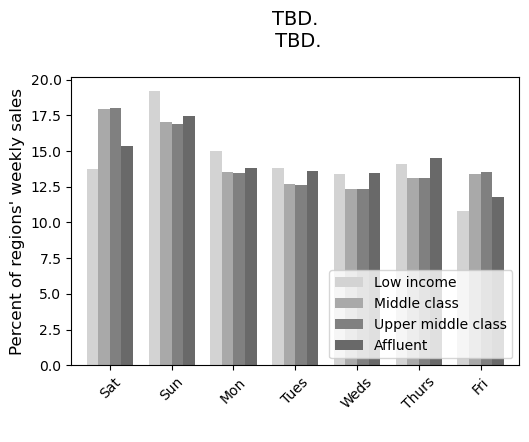

In [105]:
# Create a bar chart showing when different loyalty groups shop most often
dow_bar_by_loyalty = combo_dow_percent.plot(kind='bar', width=0.75, color = colors)

# Format margins so it isn't too crowded
plt.subplots_adjust(top=0.8)
plt.subplots_adjust(bottom=0.2)
plt.subplots_adjust(left=0.2)

# Format labels and titles for clarity
plt.ylabel('Percent of regions\' weekly sales', size=12)
plt.xticks(dow_xticks, dow, rotation = 45)
plt.xlabel(" ")
plt.xticks(rotation=45)
plt.legend(labels = labels, loc = 'lower right')
plt.title ("TBD.\n TBD.\n", size=14)

plt.show()

There isn't really any variation by region by day or order, so we'll look at ordering time of day


In [106]:
# Creating three-column subset of the 30% df
df_profile_sm = pd.DataFrame(df_order_subset.groupby([profile, 'order_hour_of_day']).total_spent_in_order.sum())

In [107]:
# First reset the index for manipulation of data
df_profile_sm = df_profile_sm.reset_index()

In [108]:
df_profile_sm.head()

,income_group,order_hour_of_day,total_spent_in_order
0,Affluent,0,"6,076.00"
1,Affluent,1,"5,502.50"
2,Affluent,2,"6,055.20"
3,Affluent,3,"3,349.50"
4,Affluent,4,"3,885.00"


In [109]:
# Pulling each of the loyalty_flag groups into their own temp dataframe to allow
# reformatting data so they'll play nice with visualizations

prof1_hod = pd.DataFrame(df_profile_sm[df_profile_sm[profile]==prof1])
prof2_hod = pd.DataFrame(df_profile_sm[df_profile_sm[profile]==prof2])
prof3_hod = pd.DataFrame(df_profile_sm[df_profile_sm[profile]==prof3])
prof4_hod = pd.DataFrame(df_profile_sm[df_profile_sm[profile]==prof4])

In [110]:
# Rename columns to be more desciptive
prof1_hod.rename(columns={'total_spent_in_order': prof1+'_total_hod'}, inplace=True)
prof2_hod.rename(columns={'total_spent_in_order': prof2+'_total_hod'}, inplace=True)
prof3_hod.rename(columns={'total_spent_in_order': prof3+'_total_hod'}, inplace=True)
prof4_hod.rename(columns={'total_spent_in_order': prof4+'_total_hod'}, inplace=True)

In [111]:
# Removing unnecessary columns
prof1_hod = prof1_hod.drop(columns = [profile])
prof2_hod = prof2_hod.drop(columns = [profile])
prof3_hod = prof3_hod.drop(columns = [profile])
prof4_hod = prof4_hod.drop(columns = [profile])

In [112]:
# Merge temp dfs
combo_profile_hod = prof1_hod.merge(prof2_hod, on = 'order_hour_of_day', how='left')

In [113]:
combo_profile_hod = combo_profile_hod.merge(prof3_hod, on = 'order_hour_of_day', how='left')

In [114]:
combo_profile_hod = combo_profile_hod.merge(prof4_hod, on = 'order_hour_of_day', how='left')

In [115]:
# Set the department name to be used as the index
combo_profile_hod = combo_profile_hod.set_index('order_hour_of_day')

In [116]:
combo_profile_hod.shape

(24, 4)

In [117]:
combo_profile_hod.head()

,Low income_total_hod,Middle class_total_hod,Upper middle class_total_hod,Affluent_total_hod
order_hour_of_day,,,,
0,"153,162.41","1,348,435.88","200,912.30","6,076.00"
1,"81,945.40","710,615.81","104,910.30","5,502.50"
2,"53,408.60","418,037.91","63,438.10","6,055.20"
3,"39,619.20","308,987.00","49,375.40","3,349.50"
4,"39,021.90","322,375.91","51,968.70","3,885.00"


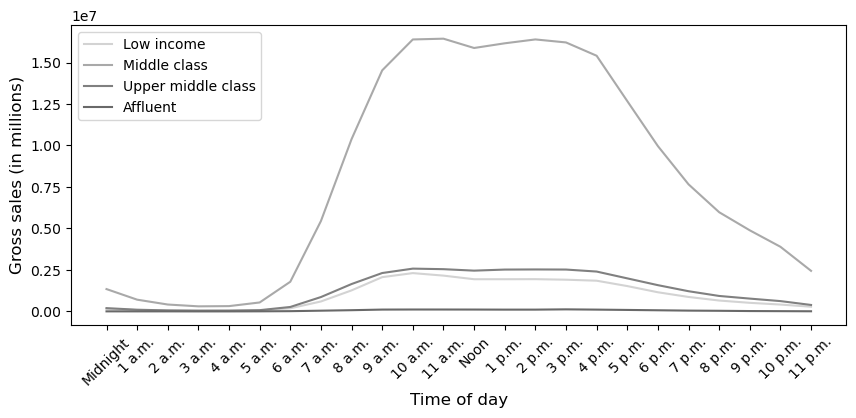

In [118]:

# Formatting the plot to have some white space around it
fig, ax = plt.subplots(figsize=(10,5))

# Creating the plot
profile_hod_line = sns.lineplot(data= combo_profile_hod[[prof1+'_total_hod', prof2+'_total_hod', prof3+'_total_hod', prof4+'_total_hod']], 
                            palette= colors, 
                            dashes = False )

# Format margins so it doesn't feel crowded
plt.subplots_adjust(top=0.8)
plt.subplots_adjust(bottom=0.2)

# Format labels and titles for clarity
plt.legend(labels = labels, 
           loc='upper left', ncol=1)
plt.xticks(hod_xticks, hod, rotation = 45)
plt.xlabel("Time of day", size = 12 )

plt.ylabel("Gross sales (in millions)", size = 12 )

#plt.title ("TBD.", size=16)

plt.show()

Compare profile with frequency of shopping

In [119]:
# Create a cross tabulation to show the proportions of the 
# loyalty groups in each frequent_shopper category
cross_tab_profile_freq = pd.crosstab(index=df_user_subset[profile],
                            columns=df_user_subset['frequent_shopper'],
                            normalize='index')
cross_tab_profile_freq

frequent_shopper,Frequent customer,Non-frequent customer,Regular customer
income_group,,,
Affluent,0.52,0.18,0.30
Low income,0.36,0.32,0.31
Middle class,0.42,0.27,0.31
Upper middle class,0.43,0.26,0.31


Compare profile with loyalty_flag

In [122]:
# Create a cross tabulation to show the proportions of the 
# profile in each category
cross_tab_profile_loy = pd.crosstab(index=df_user_subset[profile],
                            columns=df_user_subset['loyalty_flag'],
                            normalize='index')
cross_tab_profile_loy

loyalty_flag,Loyal customer,New customer,Regular customer
income_group,,,
Affluent,0.15,0.34,0.51
Low income,0.06,0.61,0.33
Middle class,0.09,0.53,0.38
Upper middle class,0.09,0.52,0.39


In [123]:
# Create a cross tabulation to show the proportions of the 
# each category in each profile
cross_tab_profile_loy = pd.crosstab(index=df_user_subset['loyalty_flag'],
                            columns=df_user_subset[profile],
                            normalize='index')
cross_tab_profile_loy

income_group,Affluent,Low income,Middle class,Upper middle class
loyalty_flag,,,,
Loyal customer,0.01,0.12,0.75,0.12
New customer,0.00,0.19,0.71,0.10
Regular customer,0.00,0.14,0.74,0.12
